# Introduction to Data Science


This file contains introductory test codes. To get the hang of Numpy, and its functons

In [1]:
import numpy as np

In [2]:
cd


C:\Users\Samuel Theophilus


In [3]:
content=!ls
print(content)

["'ls' is not recognized as an internal or external command,", 'operable program or batch file.']


In [4]:
np.arange(1,30)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [5]:
x=np.arange(1,8,2)

In [6]:
print(x)

[1 3 5 7]


In [7]:
print(x.ndim)
print(x.shape)

1
(4,)


In [8]:
#using numpy functions
x=np.arange(0,21)
x.reshape(3,7)

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20]])

In [9]:
x.size

21

In [14]:
x=x.reshape(3,7)

In [15]:
print(x[::-1,::-1])

[[20 19 18 17 16 15 14]
 [13 12 11 10  9  8  7]
 [ 6  5  4  3  2  1  0]]


In [17]:
print(x.reshape(7,3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


In [18]:
# using ufuncs
exp=2**x
print(exp)

[[      1       2       4       8      16      32      64]
 [    128     256     512    1024    2048    4096    8192]
 [  16384   32768   65536  131072  262144  524288 1048576]]


In [19]:
mask=x[x%8==0]
print(mask)

[ 0  8 16]


In [20]:
print(x.max())

20


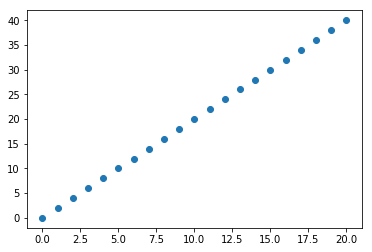

In [24]:
import matplotlib.pyplot as plt
#ploting basic graph
plt.scatter(x.reshape(1,21),np.arange(0,42,2).reshape(1,21))


In [52]:
import pandas as pd

column_names = ['type','location','current_price','years','brand','resell_price']
raw_data=pd.read_csv('C:\\Users\Samuel Theophilus\\PycharmProjects\\ML101\\data.csv',names=column_names)
print(raw_data)


    type  location  current_price  years  brand  resell_price
0      1         1         165000    1.0      1         85000
1      2         1          50000    1.0      2         20000
2      1         2          58000    2.0      1         30000
3      2         3          30000    0.4      3         21000
4      3         1         240000    1.0      4        160000
5      3         4         120000    2.0      5         55000
6      2         5          20000    2.0      6         20000
7      3         1         120000    3.0      5         50000
8      3         6         100000    2.0      4         35000
9      2         9          95000    2.0      1         95000
10     2         1         320000    1.0      7        250000
11     3         7         250000    2.0      5        110000
12     2         4          50000    1.0      8         25000
13     3         8         160000    3.0      9         65000
14     2         9          45000    1.0      6         25000


Text(0, 0.5, 'Occurences')

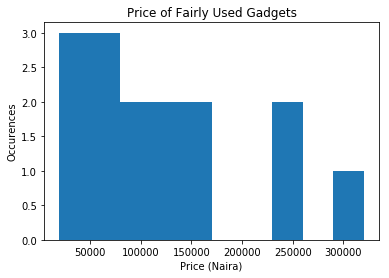

In [53]:
plt.hist(np.array(raw_data['current_price']))
plt.title('Price of Fairly Used Gadgets')
plt.xlabel('Price (Naira)')
plt.ylabel('Occurences')


# Feature Engineering Intro

The Data Set imported contains information about fairly used devices.The aim is to try predicting the price of buying a Fairly used Gadget(Tablet, Phone, Nigeria).

This execrise uses the Following as Features:
- Price of New Item
- Number of Years Item has been used
- Region of Purchase
- Type of Gadget &
- Brand of Gadget


I tried to improve the Data

1.Modify data for train data for location

In [54]:
origin = raw_data.pop('location')
raw_data['Abuja'] = (origin == 1)*1.0
raw_data['Taraba'] = (origin == 2)*1.0
raw_data['Kogi'] = (origin == 3)*1.0
raw_data['Gombe'] = (origin == 4)*1.0
raw_data['Bauchi'] = (origin == 5)*1.0
raw_data['Adamawa'] = (origin == 6)*1.0
raw_data['Kano'] = (origin == 7)*1.0
raw_data['Lagos'] = (origin == 8)*1.0
raw_data['Other'] = (origin == 9)*1.0

raw_data.tail()

,type,current_price,years,brand,resell_price,Abuja,Taraba,Kogi,Gombe,Bauchi,Adamawa,Kano,Lagos,Other
10,2,320000,1.0,7,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3,250000,2.0,5,110000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,2,50000,1.0,8,25000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,3,160000,3.0,9,65000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,2,45000,1.0,6,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


2.Modify data for train for brands



In [55]:
origin = raw_data.pop('brand')
raw_data['Samsung'] = (origin == 1)*1.0
raw_data['Blackberry'] = (origin == 2)*1.0
raw_data['HTC'] = (origin == 3)*1.0
raw_data['Dell'] = (origin == 4)*1.0
raw_data['HP'] = (origin == 5)*1.0
raw_data['Gionee'] = (origin == 6)*1.0
raw_data['Techno'] = (origin == 6)*1.0
raw_data['Apple'] = (origin == 7)*1.0
raw_data['Huawei'] = (origin == 8)*1.0
raw_data['Lenovo'] = (origin == 9)*1.0
raw_data.tail()

,type,current_price,years,resell_price,Abuja,Taraba,Kogi,Gombe,Bauchi,Adamawa,...,Samsung,Blackberry,HTC,Dell,HP,Gionee,Techno,Apple,Huawei,Lenovo
10,2,320000,1.0,250000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,3,250000,2.0,110000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2,50000,1.0,25000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,3,160000,3.0,65000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,2,45000,1.0,25000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


3.Modify data for train for Device type


In [56]:
origin = raw_data.pop('type')
raw_data['Tablet'] = (origin == 1)*1.0
raw_data['Phone'] = (origin == 2)*1.0
raw_data['Laptop'] = (origin == 3)*1.0
raw_data.tail()

,current_price,years,resell_price,Abuja,Taraba,Kogi,Gombe,Bauchi,Adamawa,Kano,...,Dell,HP,Gionee,Techno,Apple,Huawei,Lenovo,Tablet,Phone,Laptop
10,320000,1.0,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11,250000,2.0,110000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,50000,1.0,25000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,160000,3.0,65000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14,45000,1.0,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
#train dataset
train_dataset = raw_data.sample(frac=0.8,random_state=0)
test_dataset = raw_data.drop(train_dataset.index)

#seperate labels
train_labels = train_dataset.pop('resell_price')
test_labels = test_dataset.pop('resell_price')

# Build a Decision Tree

In [58]:
raw_data.shape

(15, 25)

In [133]:
import sklearn as sk
clf=sk.tree.DecisionTreeRegressor()
clf=clf.fit(np.array(train_dataset.values,dtype='float32'),np.array(train_labels.values,dtype='float32'))



Now lets test our Model
Predict value of an Item from test



In [134]:
print('Features of First Test Item:',test_dataset.values[0])
print('Label of First Test Item:',test_labels.values[0])

feature=np.array(test_dataset.values[0],dtype='float32').reshape(1,24)

#Now Predict
print('Predicted Value= N',clf.predict(feature))

Features of First Test Item: [1.65e+05 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
Label of First Test Item: 85000
Predicted Value= N [95000.]


# K Nearest Neighbours

In [136]:
clf_opt2=sk.neighbors.KNeighborsRegressor()
clf_opt2=clf_opt2.fit(np.array(train_dataset.values,dtype='float32'),np.array(train_labels.values,dtype='float32'))

print('Features of First Test Item:',test_dataset.values[0])
print('Label of First Test Item:',test_labels.values[0])

feature=np.array(test_dataset.values[0],dtype='float32').reshape(1,24)

#Now Predict
print('Predicted Value= N',clf_opt2.predict(feature))

Features of First Test Item: [1.65e+05 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
Label of First Test Item: 85000
Predicted Value= N [81000.]


# Saving the Model

In [144]:
sk.externals.joblib.dump(clf_opt2,'C:\\Users\\Samuel Theophilus\\PycharmProjects\\model.pkl')

#load model from file
model=sk.externals.joblib.load('C:\\Users\\Samuel Theophilus\\PycharmProjects\\model.pkl')


#test that Model works fine with 3 item
print('Features of First Test Item:',test_dataset.values[2])
print('Label of First Test Item:',test_labels.values[2])

feature=np.array(test_dataset.values[2],dtype='float32').reshape(1,24)

#Now Predict
print('Predicted Value= N',model.predict(feature))

Features of First Test Item: [5.e+04 1.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00
 0.e+00 0.e+00 1.e+00 0.e+00]
Label of First Test Item: 25000
Predicted Value= N [23200.]
